Лабораторная работа №2
Статистический ряд. Построение гистограммы равноинтервальным и равновероятным методами.
Задание 1. Для полученной случайной величины построить гистограмму равноинтервальным методом, полигон распределения и эмпирическую функцию распределения по сгруппированным данным. Результаты представить в виде таблицы и графика.

Text(0, 0.5, 'F(Y)')

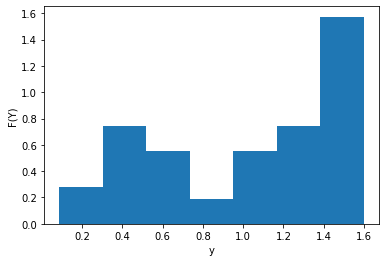

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

n = 50 #задается вручную
a = 1.
b = 5.
y0 = 1.

sample_X = []
sample_Y = []
uniform_rv = sts.uniform()
sample_xi = uniform_rv.rvs(size=n)

for i in range(n):
    x = sample_xi[i] * (b - a) + a
    sample_X.append(x)
    y = np.log(x)
    sample_Y.append(y)
    
M = int(np.sqrt(n)) if n <= 100 else int(4 * np.log10(n)) # эмпирически определяем количество интервалов
nums, probas, _ = plt.hist(sample_Y, bins=M, density=True) # строим гистограмму равноинтервальным методом
plt.xlabel("y")
plt.ylabel("F(Y)")

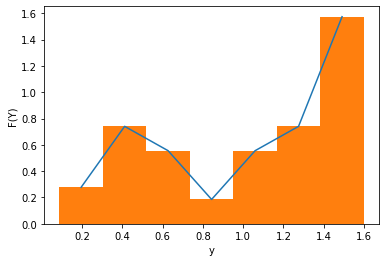

In [2]:
plt.plot(probas[:-1] + (probas[1] - probas[0]) / 2, nums) # строим полигон распределения
plt.hist(sample_Y, bins=M, density=True)
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

0.9999999999999998


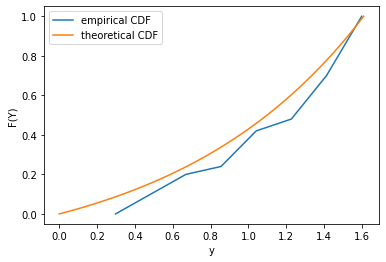

,0,1,2,3,4,5,6,7
Y,0.297407,0.483373,0.66934,0.855307,1.041274,1.227241,1.413208,1.599175
F(Y),0.000000,0.100000,0.20000,0.240000,0.420000,0.480000,0.700000,1.000000


In [3]:
# построим эмпирическую функцию распределения по сгруппированным данным

normed_nums = nums * (probas[1] - probas[0])
# убедимся, что сумма всех вероятностей равна 1:
print(normed_nums.sum())

ecdf2 = []
sum = 0.
for i in normed_nums:
    ecdf2.append(sum)
    sum += i
ecdf2.append(1)

plt.plot(probas, ecdf2, label='empirical CDF')
plt.plot(xx, yy, label='theoretical CDF')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

table = pd.DataFrame(data={"Y": probas, "F(Y)": ecdf2})
table.T


Задание 2. Найти теоретически плотность распределения СВ Y. Результаты представить в аналитическом виде и в виде графика.

Изобразим график теоретической плотности:

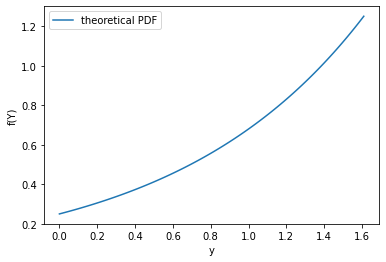

In [4]:
py = np.exp(xx) / 4
plt.plot(xx, py, label='theoretical PDF')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

Задание 3. Сравнить полученные результаты, представив графики теоретической и эмпирической плотностей распределения в одном окне.

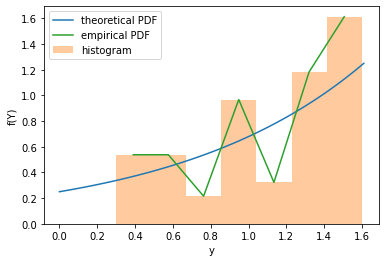

In [5]:
plt.plot(xx, py, label='theoretical PDF')
plt.hist(sample_Y, bins=M, density=True, label="histogram", alpha=0.4)
plt.plot(probas[:-1] + (probas[1] - probas[0]) / 2, nums, label='empirical PDF')

plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()


Задание 4. Для полученной случайной величины построить гистограмму равновероятностным методом, полигон распределения и эмпирическую функцию распределения по сгруппированным данным. Результаты представить в виде таблицы и графика.

In [3]:
m = n // M

def hist_eq_prob(sample):
    sample.sort()
    A = [sample[0]]
    B = []
    for i in range(1, M):
        A.append(sample[i * m])
        B.append(sample[i * m])
    B.append(sample[-1])
    d = []
    for i in range(len(A)):
        d.append(B[i] - A[i])
    y = []
    x = []
    s = A[0]
 
    for i in d:
        y.append(1. /(M * i))
        x.append(s)
        s += i
        
    return (x, y)

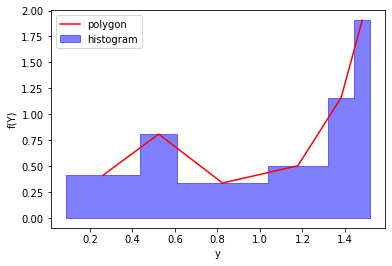

,0,1,2,3,4,5,6
x0,0.086993,0.435441,0.612183,1.036602,1.320498,1.443705,1.518635
normed m,0.409981,0.808280,0.336595,0.503203,1.159484,1.906550,1.778515


In [4]:
x, y = hist_eq_prob(sample_Y)
plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="histogram")
nx = []
for i in range(len(x) - 1):
    nx.append((x[i] + x[i+1]) / 2)
plt.plot(nx, y[:-1], color='r', label='polygon')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

table2 = pd.DataFrame(data={"x0" : x, "normed m": y})
table2.T

In [5]:
# построим эмпирическую функцию распределения по сгруппированным данным

ecdf3 = []
sum = 0.
for i in range(len(y)):
    ecdf3.append(sum)
    sum += 1 / M

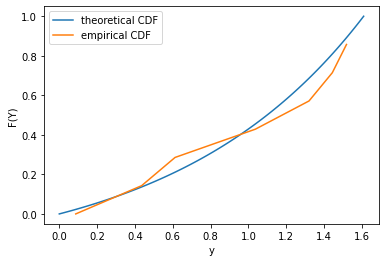

In [7]:
xx = np.linspace(np.log(1), np.log(5), 100)
yy = (np.exp(xx) - 1) / 4
plt.plot(xx, yy, label='theoretical CDF')
plt.plot(x, ecdf3, label='empirical CDF')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

Задание 5. Сравнить полученные результаты, представив графики теоретической и эмпирической плотностей распределения в одном окне.

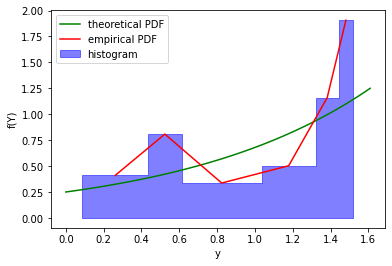

In [9]:
py = np.exp(xx) / 4
plt.plot(xx, py, label='theoretical PDF', c='g')
plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="histogram")
plt.plot(nx, y[:-1], color='r', label='empirical PDF')

plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()